### Problem Statement:

The Goal of this Projet is to give people an estimate of how much they need based on their individual health stituation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather than ineffective part.

In [2]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [3]:
# importing dataset

data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# checking the dimensions of the dataframe

data.shape

(1338, 7)

In [5]:
# Checking missing value in dataset

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
# Checking number of unique elements in the columns
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [7]:
# Checking how much memory each column uses in bytes

data.memory_usage()

Index         128
age         10704
sex         10704
bmi         10704
children    10704
smoker      10704
region      10704
expenses    10704
dtype: int64

In [8]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Column Children should be object column

data['children'] = data['children'].astype('object')

In [10]:
# Checking type and value count of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [11]:
# Checking the statistical aspects of the dataframe

data.describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


### Data Visualization

- Univariate analysis

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
# Plotting numerical columns

num_cols = data.select_dtypes(exclude = 'object')
num_cols.columns

Index(['age', 'bmi', 'expenses'], dtype='object')

In [14]:
cat_cols = data.select_dtypes(include = 'object')
cat_cols.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

<Figure size 1080x432 with 0 Axes>

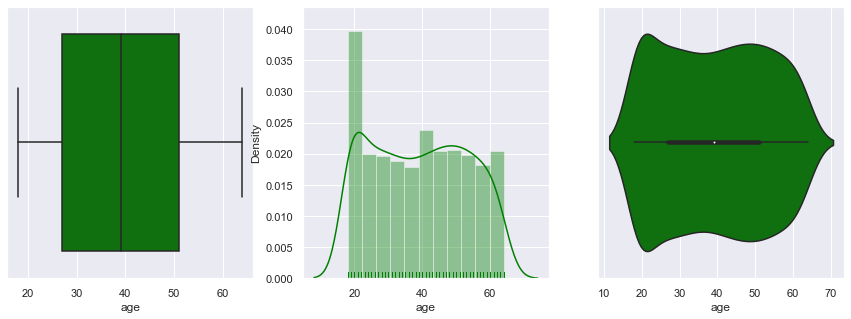

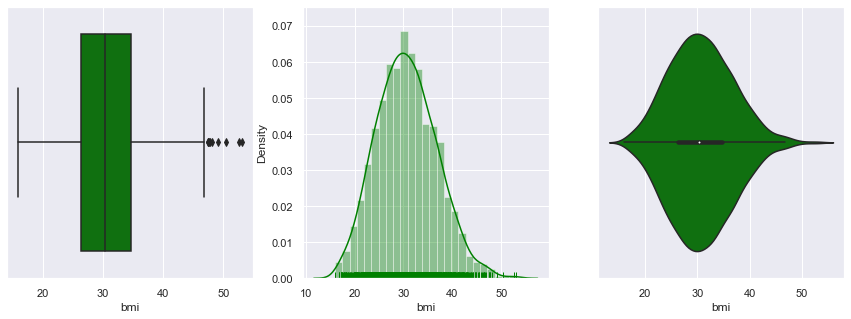

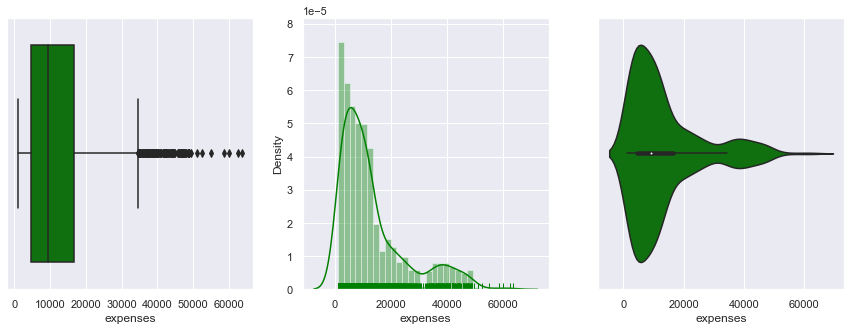

In [15]:
plt.figure(figsize = (15,6))
f_num = num_cols.columns[:]

for i in enumerate(f_num):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(num_cols[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num_cols[i[1]], rug = True,  color= 'Green')
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num_cols[i[1]], orient= 'vertical',  color= 'Green')
    
    plt.show()

### Inferences:

<Figure size 1080x720 with 0 Axes>

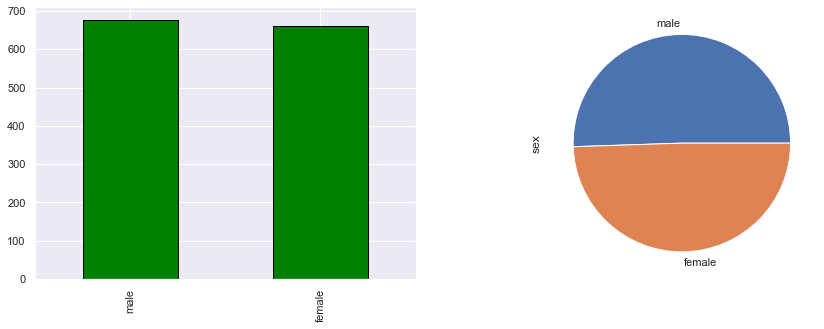

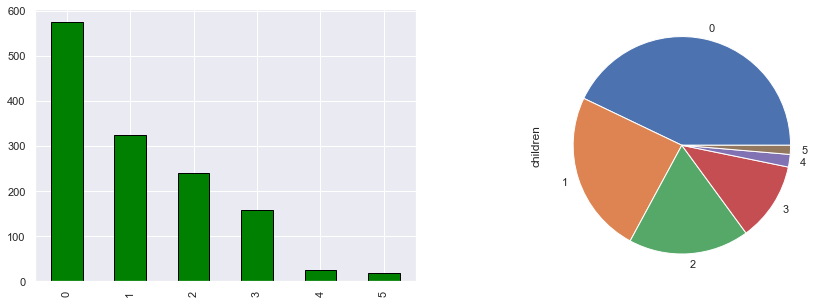

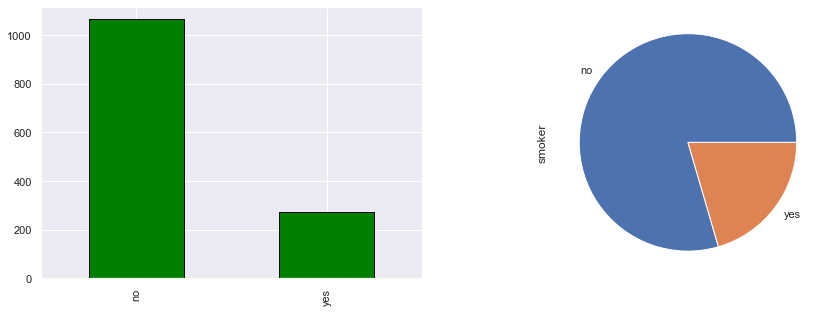

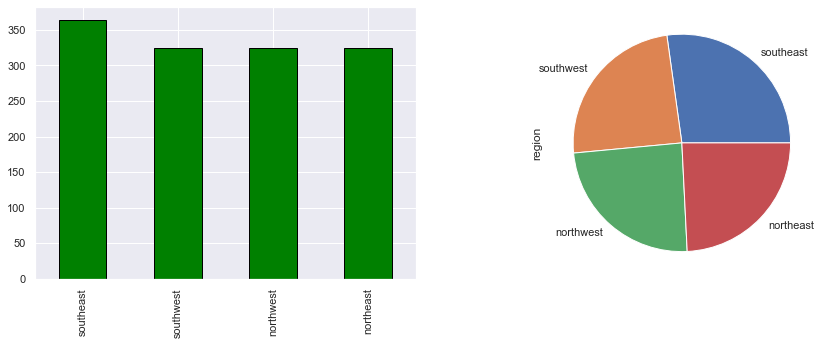

In [16]:
plt.figure(figsize = (15,10))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    cat_cols[i[1]].value_counts().plot.bar(color= 'Green',edgecolor='Black')

    ax1 = f.add_subplot(122)
    cat_cols[i[1]].value_counts().plot.pie()
    
    
    plt.show()

### Inferences:

### Data Visualization
- Bivariate analysis of Numerical columns w.r.t. target column expenses

<Figure size 1080x720 with 0 Axes>

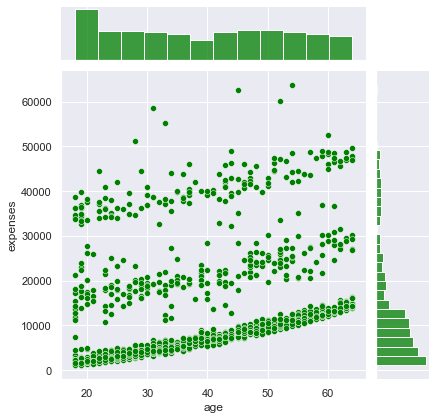

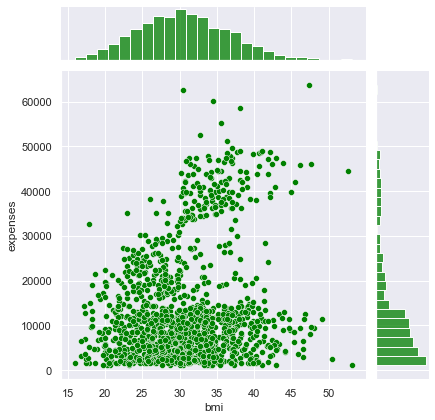

In [17]:
plt.figure(figsize = (15,10))

f_num = num_cols.columns[:-1]

for i in enumerate(f_num):

    sns.jointplot(num_cols[i[1]],y= data.expenses, color= 'Green', kind = 'scatter')
    plt.show()


### Inferences:

### Data Visualization
- Bivariate analysis of categorical columns w.r.t. target column expenses

<Figure size 1080x576 with 0 Axes>

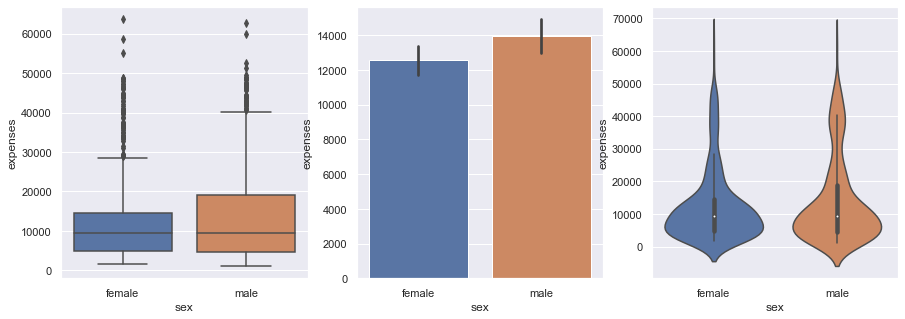

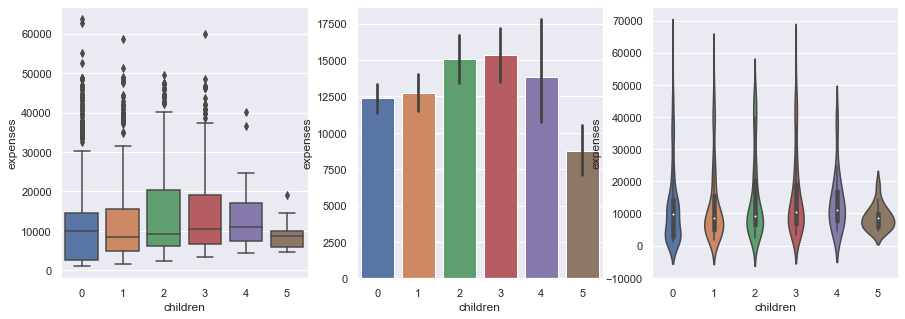

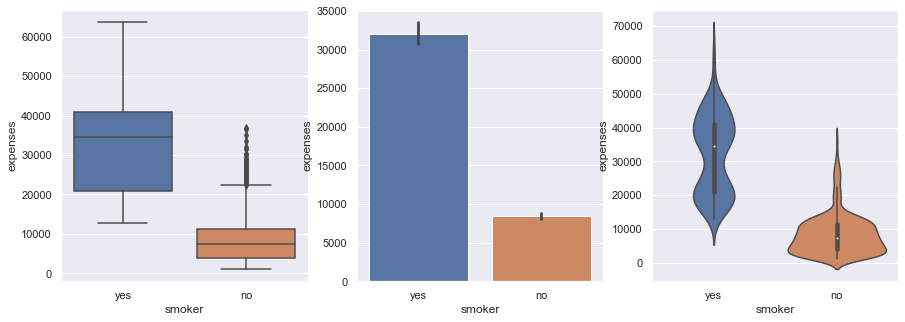

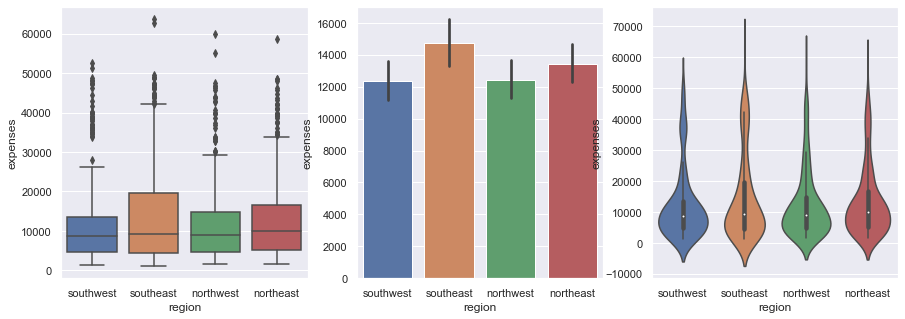

In [18]:
plt.figure(figsize = (15,8))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = cat_cols[i[1]], y= data.expenses)

    ax1 = f.add_subplot(132)
    sns.barplot(x = cat_cols[i[1]], y= data.expenses)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = cat_cols[i[1]], y= data.expenses, orient= 'vertical')
    
    plt.show()

### Inferences:

### Data Visualization
- Multivariate analysis

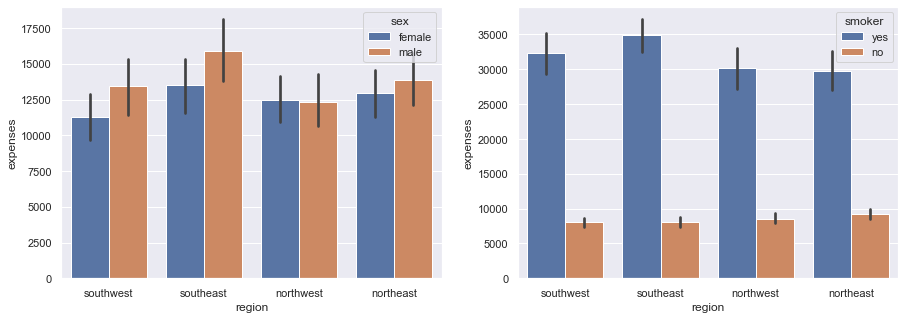

In [19]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.region, data.expenses, hue = data.sex)

ax1 = f.add_subplot(122)
sns.barplot(data.region, data.expenses, hue = data.smoker)
plt.show()

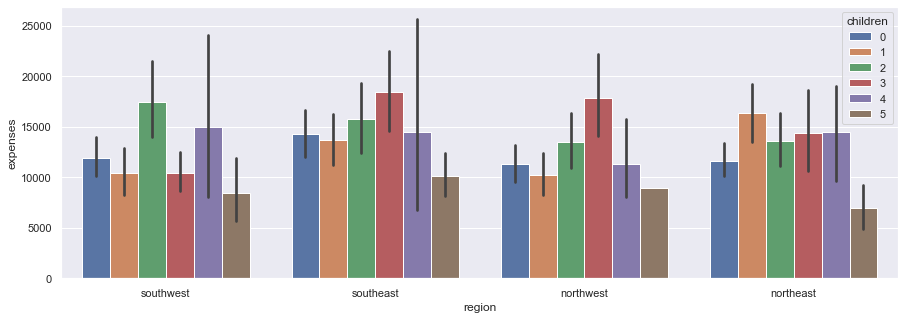

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(data.region, data.expenses, hue = data.children)
plt.show()

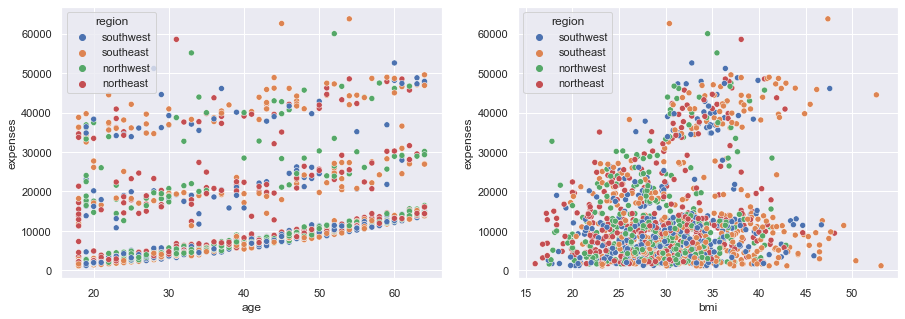

In [21]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(data.age, data.expenses, hue = data.region)

ax1 = f.add_subplot(122)
sns.scatterplot(data.bmi, data.expenses, hue = data.region)
plt.show()

In [22]:
#smoker

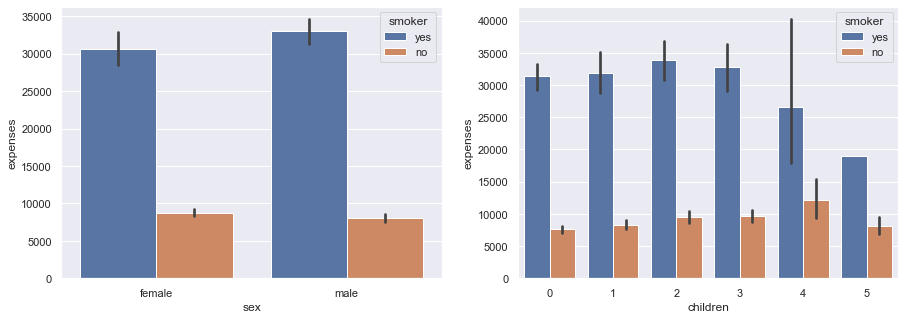

In [23]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.sex, data.expenses, hue = data.smoker)

ax1 = f.add_subplot(122)
sns.barplot(data.children, data.expenses, hue = data.smoker)
plt.show()

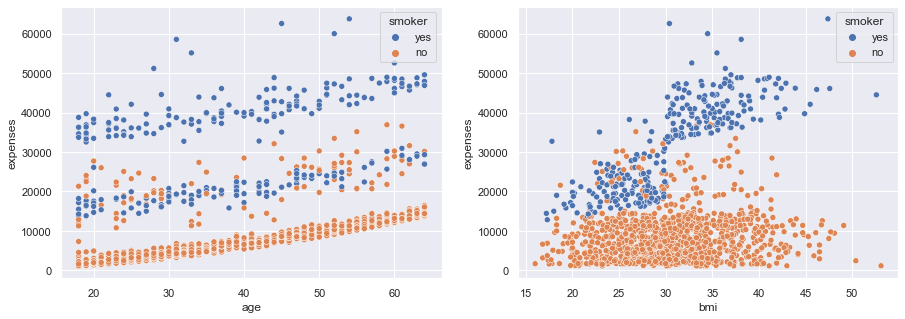

In [24]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot(data.age, data.expenses, hue = data.smoker)

ax1 = f.add_subplot(122)
sns.scatterplot(data.bmi, data.expenses, hue = data.smoker)
plt.show()

In [25]:
# 

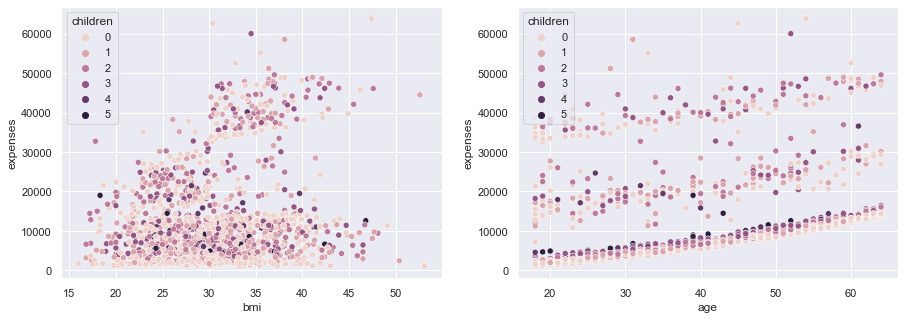

In [26]:
f = plt.figure(figsize=(15,5))

ax1 = f.add_subplot(121)
sns.scatterplot(data.bmi, data.expenses, hue = data.children)

ax2 = f.add_subplot(122)
sns.scatterplot(data.age, data.expenses, hue = data.children)
plt.show()

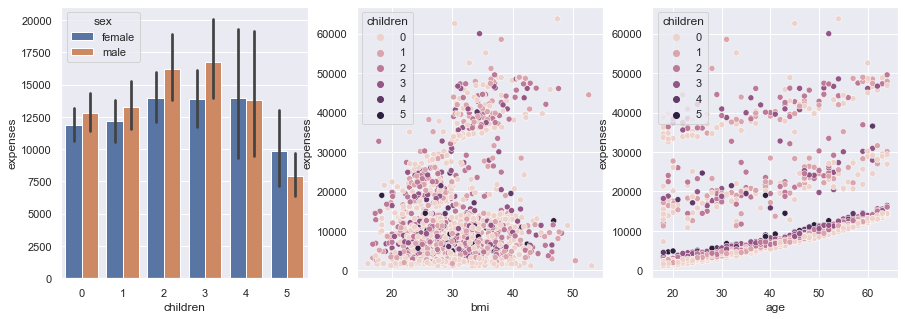

In [27]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
sns.barplot(data.children, data.expenses, hue = data.sex)

ax1 = f.add_subplot(132)
sns.scatterplot(data.bmi, data.expenses, hue = data.children)

ax2 = f.add_subplot(133)
sns.scatterplot(data.age, data.expenses, hue = data.children)
plt.show()

### Data Visualization
- Pairplot & Heatmap

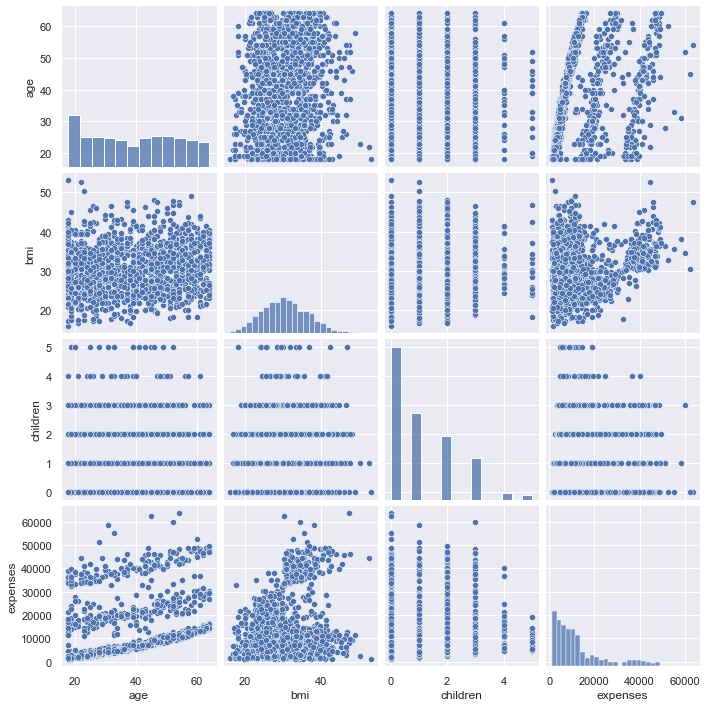

In [28]:
sns.pairplot(data)
plt.show()

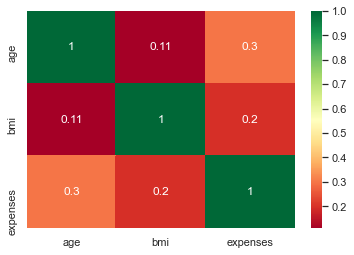

In [29]:
sns.heatmap(data.corr(), cmap= 'RdYlGn', annot = True)
plt.show()

### Feature Engineering

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [32]:
# Column sex
sex_dummies = pd.get_dummies(data.sex, drop_first= True)

data = pd.concat([data, sex_dummies], axis = 1)

# Column children
children_dummies = pd.get_dummies(data.children, drop_first= True)

data = pd.concat([data, children_dummies], axis = 1)

# Column smoker
smoker_dummies = pd.get_dummies(data.smoker, drop_first= True)

data = pd.concat([data, smoker_dummies], axis = 1)

# Column region
region_dummies = pd.get_dummies(data.region, drop_first= True)

data = pd.concat([data, region_dummies], axis = 1)

In [33]:
data=data.drop('sex', axis=1)
data=data.drop('children', axis=1)
data=data.drop('smoker', axis=1)
data=data.drop('region', axis=1)
data.head()

,age,bmi,expenses,male,1,2,3,4,5,yes,northwest,southeast,southwest
0,19,27.9,16884.92,0,0,0,0,0,0,1,0,0,1
1,18,33.8,1725.55,1,1,0,0,0,0,0,0,1,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,0,1,0
3,33,22.7,21984.47,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3866.86,1,0,0,0,0,0,0,1,0,0


In [34]:
import sklearn 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['age','bmi','expenses']] = scaler.fit_transform(data[['age','bmi','expenses']])
data.shape

(1338, 13)

In [35]:
data.head()

,age,bmi,expenses,male,1,2,3,4,5,yes,northwest,southeast,southwest
0,0.021739,0.320755,0.251611,0,0,0,0,0,0,1,0,0,1
1,0.000000,0.479784,0.009636,1,1,0,0,0,0,0,0,1,0
2,0.217391,0.458221,0.053115,1,0,0,1,0,0,0,0,1,0
3,0.326087,0.180593,0.333010,1,0,0,0,0,0,0,1,0,0
4,0.304348,0.347709,0.043816,1,0,0,0,0,0,0,1,0,0


In [36]:
X= data.drop(['expenses'], axis = 1)
y = data['expenses']

In [37]:
# Train_test_split

from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [39]:
X_train.shape

(1070, 12)

In [40]:
X_test.shape

(268, 12)

In [41]:
y_train.shape

(1070,)

In [42]:
y_test.shape

(268,)

## Linear regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
linear_reg = lr.fit(X_train, y_train)
linear_reg

LinearRegression()

In [46]:
y_pred_lin = linear_reg.predict(X_train)
y_pred_lin

array([0.10638401, 0.11518175, 0.1282793 , ..., 0.16479266, 0.58814885,
       0.16444092])

In [47]:
# Linear regression metrics

from sklearn import metrics

r2_score_train_lin = metrics.r2_score(y_train, y_pred_lin)

print(f'R2 score train= {r2_score_train_lin}')

R2 score train= 0.7432399481245675


In [48]:
MSE_train = metrics.mean_squared_error(y_train,y_pred_lin)

print(f' MSE train = {MSE_train}')

 MSE train = 0.009442190915217032


In [49]:
y_test_pred_lin = linear_reg.predict(X_test)
y_test_pred_lin

array([ 1.36794224e-01,  9.36787304e-02,  5.69981252e-01,  1.21235945e-01,
        4.10933489e-01,  1.52771243e-01, -1.64523948e-02,  2.50745511e-01,
       -5.09681974e-04,  1.49640824e-01,  4.19546530e-01,  1.42010375e-01,
        6.39648119e-02,  5.84184380e-01,  6.23920811e-01,  5.84721203e-01,
        2.36197636e-01,  5.53129684e-01,  1.25941332e-01,  4.83507837e-01,
        2.39231445e-02,  1.54506497e-01,  1.88760354e-02,  9.51701399e-02,
        1.51048446e-01,  1.88950520e-01,  2.13352634e-01,  6.86456450e-02,
        1.52520504e-01,  1.55972352e-02,  1.52647939e-01,  1.89783066e-01,
        5.41331829e-02,  2.53536690e-02,  5.08073897e-02,  1.89378971e-01,
        1.14567866e-02,  1.20774773e-01,  5.10833527e-01,  4.99843223e-01,
        2.48640063e-02,  4.82674442e-02,  2.05873953e-01,  1.63810259e-01,
        1.32894453e-01,  1.73317905e-01,  7.62064240e-02,  2.13314960e-02,
        5.37587761e-01,  1.38570219e-01,  2.34570728e-01,  1.70989645e-02,
        1.76392777e-01,  

In [50]:
r2_score_test_lin = metrics.r2_score(y_test, y_test_pred_lin)

print(f'R2 score test = {r2_score_test_lin}')

R2 score test = 0.7825414820534851


In [51]:
MSE_test_lin = metrics.mean_squared_error(y_test,y_test_pred_lin)
print(f'MSE test = {MSE_test_lin}')

MSE test = 0.0086016606392308


## Decision Tree

In [81]:
X_train.head()

,age,bmi,male,1,2,3,4,5,yes,northwest,southeast,southwest
560,0.608696,0.107817,0,0,1,0,0,0,0,1,0,0
1285,0.630435,0.223720,0,0,0,0,0,0,0,0,0,0
1142,0.739130,0.239892,0,0,0,0,0,0,0,0,1,0
969,0.456522,0.493261,0,0,0,0,0,1,0,0,1,0
486,0.782609,0.148248,0,0,0,1,0,0,0,1,0,0


In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
DT = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10,
                           random_state= 0)

In [54]:
Dec_tree = DT.fit(X_train, y_train)
Dec_tree

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5,
                      random_state=0)

In [55]:
y_train_pred_DT= Dec_tree.predict(X_train)
y_train_pred_DT

array([0.14820615, 0.14820615, 0.18549749, ..., 0.18549749, 0.66201702,
       0.18549749])

In [56]:
print('r2_score on training data =', metrics.r2_score(y_true=y_train,
                                                      y_pred=y_train_pred_DT))

r2_score on training data = 0.8581655896152035


In [57]:
y_test_pred_DT = Dec_tree.predict(X_test)
y_test_pred_DT

array([0.14820615, 0.08346489, 0.38105553, 0.14820615, 0.56776346,
       0.08346489, 0.03580117, 0.22727102, 0.08346489, 0.14820615,
       0.27496647, 0.08346489, 0.08346489, 0.66201702, 0.73104254,
       0.66201702, 0.14820615, 0.66201702, 0.14820615, 0.38105553,
       0.08346489, 0.14820615, 0.03580117, 0.03580117, 0.14820615,
       0.18549749, 0.22727102, 0.08346489, 0.14820615, 0.03580117,
       0.08346489, 0.18549749, 0.03580117, 0.08346489, 0.08346489,
       0.14820615, 0.03580117, 0.14820615, 0.38105553, 0.66201702,
       0.03580117, 0.03580117, 0.18549749, 0.22727102, 0.08346489,
       0.22727102, 0.03580117, 0.08346489, 0.66201702, 0.08346489,
       0.22727102, 0.03580117, 0.08346489, 0.03580117, 0.18549749,
       0.14820615, 0.08346489, 0.66201702, 0.18549749, 0.18549749,
       0.22727102, 0.08346489, 0.22727102, 0.08346489, 0.18549749,
       0.08346489, 0.27496647, 0.18549749, 0.08346489, 0.03580117,
       0.08346489, 0.14820615, 0.14820615, 0.08346489, 0.14820

In [58]:
print('r2_score on test data =', metrics.r2_score(y_true=y_test,
                                                  y_pred=y_test_pred_DT))

r2_score on test data = 0.8616937929481534


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_Dec_tree = GridSearchCV(Dec_tree, param_grid, cv=5)

grid_cv_Dec_tree.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [60]:
print("R-Squared::{}".format(grid_cv_Dec_tree.best_score_))

print("Best Hyperparameters::\n{}".format(grid_cv_Dec_tree.best_params_))

R-Squared::0.8486358166846181
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [61]:
param_grid = {"criterion": ["mse"],
              "min_samples_split": [10],
              "max_depth": [6],
              "min_samples_leaf": [20],
              "max_leaf_nodes": [20],
              }

grid_cv_Dec_tree = GridSearchCV(Dec_tree, param_grid, cv=5)

grid_cv_Dec_tree.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             param_grid={'criterion': ['mse'], 'max_depth': [6],
                         'max_leaf_nodes': [20], 'min_samples_leaf': [20],
                         'min_samples_split': [10]})

In [62]:
from sklearn.model_selection import cross_val_score

r2_scores_DT_train = cross_val_score(grid_cv_Dec_tree.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_Dec_tree.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores_DT_train)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.846
MSE::-0.006


In [63]:
best_dtm_model = grid_cv_Dec_tree.best_estimator_

y_test_pred_DT = best_dtm_model.predict(X_test)

r2_score_DT_test = best_dtm_model.score(X_test,y_test_pred_DT)
print("R-squared:{:.3f}".format(r2_score_DT_test))
print("MSE: %.2f" % metrics.mean_squared_error(y_test_pred_DT, y_test_pred_DT))

R-squared:1.000
MSE: 0.00


## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gbm=GradientBoostingRegressor(n_estimators=400, 
                              max_depth=5, 
                              loss='ls',
                              min_samples_split=2,
                              learning_rate=0.1)

gbm_model = gbm.fit(X_train, y_train)
gbm_model

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [65]:
y_train_pred_gbm= gbm_model.predict(X_train)
y_train_pred_gbm

array([0.11900267, 0.14025432, 0.38459117, ..., 0.17313592, 0.71607155,
       0.15925593])

In [66]:
print('r2_score on training data =', metrics.r2_score(y_true=y_train,
                                                      y_pred=y_train_pred_gbm))

r2_score on training data = 0.9932771226495534


In [67]:
y_test_pred_gbm = Dec_tree.predict(X_test)
y_test_pred_gbm

array([0.14820615, 0.08346489, 0.38105553, 0.14820615, 0.56776346,
       0.08346489, 0.03580117, 0.22727102, 0.08346489, 0.14820615,
       0.27496647, 0.08346489, 0.08346489, 0.66201702, 0.73104254,
       0.66201702, 0.14820615, 0.66201702, 0.14820615, 0.38105553,
       0.08346489, 0.14820615, 0.03580117, 0.03580117, 0.14820615,
       0.18549749, 0.22727102, 0.08346489, 0.14820615, 0.03580117,
       0.08346489, 0.18549749, 0.03580117, 0.08346489, 0.08346489,
       0.14820615, 0.03580117, 0.14820615, 0.38105553, 0.66201702,
       0.03580117, 0.03580117, 0.18549749, 0.22727102, 0.08346489,
       0.22727102, 0.03580117, 0.08346489, 0.66201702, 0.08346489,
       0.22727102, 0.03580117, 0.08346489, 0.03580117, 0.18549749,
       0.14820615, 0.08346489, 0.66201702, 0.18549749, 0.18549749,
       0.22727102, 0.08346489, 0.22727102, 0.08346489, 0.18549749,
       0.08346489, 0.27496647, 0.18549749, 0.08346489, 0.03580117,
       0.08346489, 0.14820615, 0.14820615, 0.08346489, 0.14820

In [68]:
print('r2_score on test data =', metrics.r2_score(y_true=y_test,
                                                  y_pred=y_test_pred_gbm))

r2_score on test data = 0.8616937929481534


In [69]:
param_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}

grid_cv_gbm = GridSearchCV(gbm_model, param_grid, cv=5)

grid_cv_gbm.fit(X,y)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, n_estimators=400),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]})

In [70]:
print("R-Squared::{}".format(grid_cv_gbm.best_score_))

print("Best Hyperparameters::\n{}".format(grid_cv_gbm.best_params_))

R-Squared::0.8589255733723211
Best Hyperparameters::
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'random_state': 1, 'subsample': 0.75}


In [71]:
param_grid={'n_estimators':[1000],
             'learning_rate':[0.01],
             'max_depth':[2],
             'subsample':[.75],
             'random_state':[1]}

grid_cv_gbm = GridSearchCV(gbm_model, param_grid, cv=5)

grid_cv_gbm.fit(X,y)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, n_estimators=400),
             param_grid={'learning_rate': [0.01], 'max_depth': [2],
                         'n_estimators': [1000], 'random_state': [1],
                         'subsample': [0.75]})

In [72]:
r2_scores_gdm_train = cross_val_score(grid_cv_gbm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_gbm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores_gdm_train)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.859
MSE::-0.005


In [73]:
best_dtm_model = grid_cv_gbm.best_estimator_

y_test_pred_gbm = best_dtm_model.predict(X_test)

r2_scores_gdm_test = best_dtm_model.score(X_test,y_test_pred_gbm)
print("R-squared:{:.3f}".format(r2_scores_gdm_test))
print("MSE: %.2f" % metrics.mean_squared_error(y_test_pred_DT, y_test_pred_gbm))

R-squared:1.000
MSE: 0.00


## Model selection:

In [74]:
# Linear regression
print(f'R-squared value for train : {r2_score_train_lin}')
print(f'R-squared value for test : {r2_score_test_lin}')
print('\n')

# Descision tree

print(f'R-squared value for train : {np.mean(r2_scores_DT_train)}')
print(f'R-squared value for test : {r2_score_DT_test}')
print('\n')

# Gradient boosting

print(f'R-squared value for train : {np.mean(r2_scores_gdm_train)}')
print(f'R-squared value for test : {r2_scores_gdm_test}')

R-squared value for train : 0.7432399481245675
R-squared value for test : 0.7825414820534851


R-squared value for train : 0.8464441445025297
R-squared value for test : 1.0


R-squared value for train : 0.8585627839451385
R-squared value for test : 1.0


### Selecting Gradient boosting model

In [75]:
import pickle

In [76]:
filename = 'insurance_premium_prediction_pkl'
outfile = open(filename,'wb')

pickle.dump(grid_cv_gbm,outfile)
outfile.close()

In [77]:
import sklearn.externals as extjoblib
import joblib

joblib.dump(grid_cv_gbm, 'model/premium_pred_model.pkl')

premium_pred_model = joblib.load('model/premium_pred_model.pkl')

In [78]:
response = premium_pred_model.predict(X_test)

In [79]:
response

array([0.14693088, 0.088317  , 0.43247249, 0.1383975 , 0.54386013,
       0.07955352, 0.02577393, 0.23017618, 0.05288266, 0.15769299,
       0.29107475, 0.12127202, 0.07190645, 0.69424291, 0.73066793,
       0.68984833, 0.15991291, 0.68519793, 0.13518138, 0.36572663,
       0.04556328, 0.13023341, 0.02354817, 0.04177366, 0.1732947 ,
       0.1900794 , 0.21875362, 0.07829132, 0.15993925, 0.02508163,
       0.13148906, 0.18935533, 0.03508835, 0.06201655, 0.05053248,
       0.13372316, 0.03006545, 0.12031202, 0.3940333 , 0.60791403,
       0.03194874, 0.039357  , 0.19008759, 0.21174393, 0.09404735,
       0.22389207, 0.08476143, 0.05459025, 0.66576372, 0.08200886,
       0.22493082, 0.02547925, 0.11680641, 0.02271347, 0.18416154,
       0.17762879, 0.05988476, 0.60409724, 0.17915068, 0.18886464,
       0.21760388, 0.07915893, 0.23442421, 0.11834287, 0.18924359,
       0.06906889, 0.30040568, 0.19782765, 0.0568024 , 0.02405718,
       0.10199794, 0.15638418, 0.14878062, 0.10620794, 0.13843

In [82]:
X_train.head()

,age,bmi,male,1,2,3,4,5,yes,northwest,southeast,southwest
560,0.608696,0.107817,0,0,1,0,0,0,0,1,0,0
1285,0.630435,0.223720,0,0,0,0,0,0,0,0,0,0
1142,0.739130,0.239892,0,0,0,0,0,0,0,0,1,0
969,0.456522,0.493261,0,0,0,0,0,1,0,0,1,0
486,0.782609,0.148248,0,0,0,1,0,0,0,1,0,0


In [92]:
model_columns= list(X_train.columns)
model_columns

['age',
 'bmi',
 'male',
 1,
 2,
 3,
 4,
 5,
 'yes',
 'northwest',
 'southeast',
 'southwest']

In [91]:
joblib.dump(model_columns, 'model/model_columns.pkl')

['model/model_columns.pkl']

In [ ]:
     for col in model_columns:
          if col not in query.columns:
               query[col] = 0